# Autoencoder Network Model

## Train for 5 epochs

Observe the loss decreasing while training.

In [1]:
%%capture
!python ConvolutionalAutoEncoder.py --max_epochs=5

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs


In [5]:
!tensorboard --logdir=./lightning_logs

^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [7]:
__import__("sys").path.append("..")
import utils
from ConvolutionalAutoEncoder import ConvolutionalAutoEncoder

model = utils.load_trained_model_for_evaluation(ConvolutionalAutoEncoder, 0)
print(model)

ConvolutionalAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


## Generate similar MNIST images

     Original image <----> Generated Image


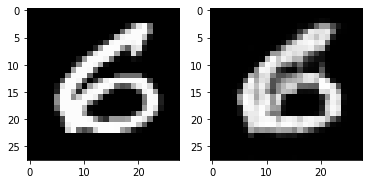

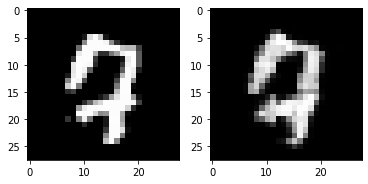

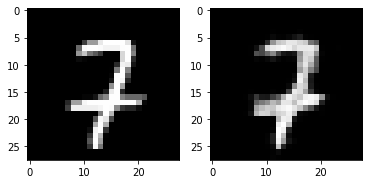

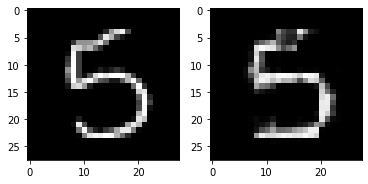

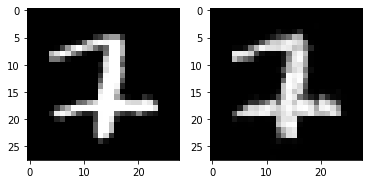

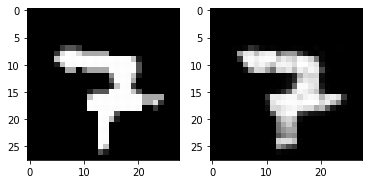

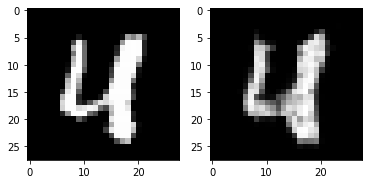

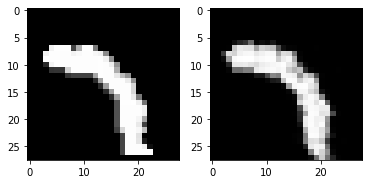

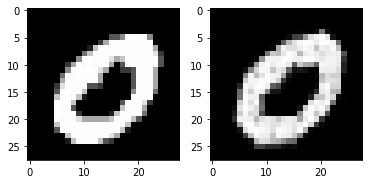

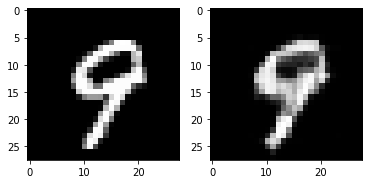

In [8]:
import torch
import random

test_len = model.mnist_test.data.shape[0]

print("     Original image <----> Generated Image")

for i in range(0, 10):
    orig_img, _ = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    predicted_img = model(orig_img).detach()
    utils.plot_images([orig_img.view(28, 28), predicted_img.view(28, 28)])